# Lab 2 Exploring Image Data

Nick Chao

## 1.0 Business Understanding

The primary purpose of this dataset is to recongize plants from the photo. The complete dataset includes 5 classifications of plants (daisies, tulips, roses, sunflowers, and dandelions). Each class of flower has roughly 800 photos. 

There is a huge potential value for the ability to classify flowers and other plants based on their photo. For example, imagine a person who often explores nature. For the most part, the vegetation they encounter is likely worthless and common. However, there is a plausable possibility that they run into a rare, unusual looking plant. If they were able to take a photo and easily identify the plant it could help determine whether the person ran into a valuable commodity. It could be valuable based on it's looks or its use (medical). 

Any high-end plant dealer would be interested in this application as it could help increase their supply of rare plants. This isn't the only third party that would be interested though. There are many pharmaceutical companies that would pay top dollar for rare medical herbs. These herbs in turn could help them create new drugs and cures for people suffering with rare medicial diseases. 

This test does not need to be perfect, but should be reasonably accurate in order to not have a lot of false positives. In this case we would rather have more false positives (Predicts valuable flower but is common) than false negatives (Predicts common flower but is rare), as it would be relatively cheap to remove the plant from the wildlife and confirm it later. We obviously still do not want a lot of inaccurate predictions but the common flowers should have a high accuray rate, perhaps 99%.

Obviously I would need a lot of data to be able to complete this goal. The purpose of this dataset is to see if it is possible to differentiate between two different flowers. If this is possible then the above is very probable. In order to simplify this dataset I only used two classes; dandelions and roses. One is a common weed, the other is a precious flower. 

Data: https://www.kaggle.com/alxmamaev/flowers-recognition/data



## 2.0 Data Preparation

In [3]:
%matplotlib inline

import numpy as np
import scipy as sci
import pandas as pd
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import seaborn as sns
import sklearn as sk
import glob
import os
import sys


# Checking for input data files
# Should be flowers and flowers.zip
from subprocess import check_output
print(check_output(["ls", "../data"]).decode("utf8"))

flower_kernal
flowers



In [4]:
#Set the image size and path to the data
img_size = (300,400)
#img_path_1 = '../data/flowers/daisy'     # 770 items
img_path_2 = '../data/flowers/dandelion'  # 1056 items 
img_path_3 = '../data/flowers/rose'       # 785 items
#img_path_4 = '../data/flowers/sunflower' # 735 items
#img_path_5 = '../data/flowers/tulip'     # 985 items

# Not including daisy, sunflower, and tulips as the process takes too long

img_paths = []
img_annotations = []

#The images are stored in subdirectories - go through all of them
# for dirpath, dirnames, filenames in os.walk(img_path_1):
#     for filename in [f for f in filenames if f.endswith(".jpg")]:
#         img_paths.append(os.path.join(dirpath, filename))
#         img_annotations.append('daisy')
        
for dirpath, dirnames, filenames in os.walk(img_path_2):
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        img_paths.append(os.path.join(dirpath, filename))
        img_annotations.append('dandelion')
        
for dirpath, dirnames, filenames in os.walk(img_path_3):
    for filename in [f for f in filenames if f.endswith(".jpg")]:
        img_paths.append(os.path.join(dirpath, filename))
        img_annotations.append('rose')
        
# for dirpath, dirnames, filenames in os.walk(img_path_4):
#     for filename in [f for f in filenames if f.endswith(".jpg")]:
#         img_paths.append(os.path.join(dirpath, filename))
#         img_annotations.append('sunflower')
        
# for dirpath, dirnames, filenames in os.walk(img_path_5):
#     for filename in [f for f in filenames if f.endswith(".jpg")]:
#         img_paths.append(os.path.join(dirpath, filename))
#         img_annotations.append('tulip')

In [5]:
# Run for compression
img_data = []
for path in img_paths[0:1841]:
    img_data.append(color.rgb2grey(resize(plt.imread(path).astype(np.uint8),img_size)).flatten())
img_annotations = img_annotations[0:1841]

/Users/nchaos/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


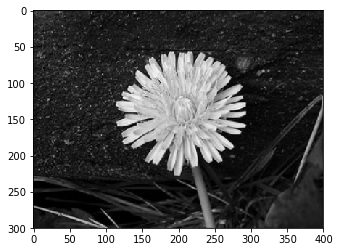

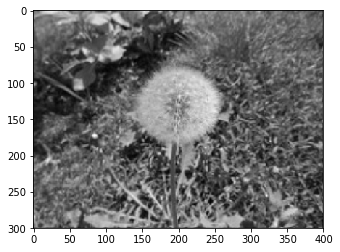

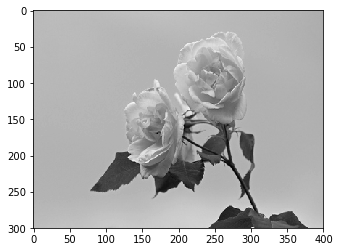

In [6]:
plt.imshow(img_data[0].reshape(img_size),cmap='gray')
plt.show()
plt.imshow(img_data[600].reshape(img_size),cmap='gray')
plt.show()
plt.imshow(img_data[1200].reshape(img_size),cmap='gray')
plt.show()

## 3.0 Data Reduction

### 3.1 Linear Dimensionality

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=300)
%time pca.fit(img_data)

CPU times: user 2min 32s, sys: 1min 55s, total: 4min 27s
Wall time: 6min 21s


PCA(copy=True, iterated_power='auto', n_components=300, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# Borrowed from https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

# a helper plotting function
def plot_gallery(images, titles, h, w, n_row=3, n_col=6):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.7 * n_col, 2.3 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#plot_gallery(X, names[y], h, w) # defaults to showing a 3 by 6 subset of the faces


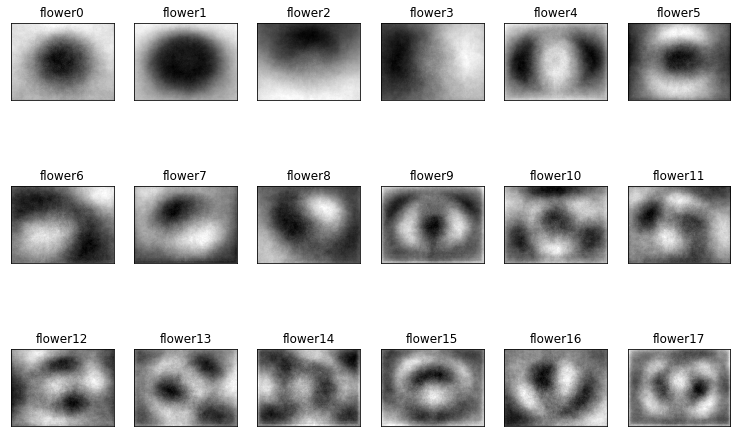

In [9]:
eigenflower = pca.components_.reshape((300,300, 400))
eigenlabels = ['flower' + str(i) for i in range(eigenflower.shape[0])]

plot_gallery(eigenflower, eigenlabels, 300, 400)

Not surprisingly, the eigenflowers that the PCA gives us very unidentifiable images. If you know that they are suppose to be flowers (dandelions specifically) then you can sort of see how they could be flowers.

In [10]:
# from https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

# manipulated from Sebastian Raschka Example (your book!)
# also from hi blog here: http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Scatter, Marker, Layout, XAxis, YAxis, Bar, Line
    
    plotly.offline.init_notebook_mode() # run at the start of every notebook
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
plot_explained_variance(pca)

2.4.1


As you can see in the above plot, there is a reasonably high explained variance (90%) with only 300 components. More than half of the explained variance comes from the first 5 components. It is possible to increase the variabillity of the dataset by adding more components but it would not really warrent the major increase in dimensionality. I suspect that doubling the components from 300 to 600 would only change the variance from 90% to 95% or so. 

Given the fact that these pictures are somewhat different from each other (type of flower, quaility of picture, angle, etc.) It makes sense that it would take a significant amount of more components to represent all of the images in the dataset. Although 300 components may still be considered large, given this specific dataset it is still a good reduction in dimensionality. 

### 3.2 Nonlinear Dimensionality

In [11]:
# Don't Run again... Takes nearly 2 hours...

# from sklearn.decomposition import KernelPCA

# kpca = KernelPCA(n_components=300, kernel='rbf', fit_inverse_transform=True, gamma=12, remove_zero_eig=True)

# %time kpca.fit(img_data)

CPU times: user 1h 42min 23s, sys: 3min 9s, total: 1h 45min 33s
Wall time: 1h 40s


KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=True, gamma=12, kernel='rbf',
     kernel_params=None, max_iter=None, n_components=300, n_jobs=1,
     random_state=None, remove_zero_eig=True, tol=0)

In [36]:
# the below defs are from 
# https://stackoverflow.com/questions/42653386/does-pickle-randomly-fail-with-oserror-on-large-files?rq=
# for the solution to save large file sizes

def save_as_pickled_object(obj, filepath):
    """
    This is a defensive way to write pickle.write, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    bytes_out = pickle.dumps(obj)
    n_bytes = sys.getsizeof(bytes_out)
    with open(filepath, 'wb') as f_out:
        for idx in range(0, n_bytes, max_bytes):
            f_out.write(bytes_out[idx:idx+max_bytes])

def try_to_load_as_pickled_object_or_None(filepath):
    """
    This is a defensive way to write pickle.load, allowing for very large files on all platforms
    """
    max_bytes = 2**31 - 1
    try:
        input_size = os.path.getsize(filepath)
        bytes_in = bytearray(0)
        with open(filepath, 'rb') as f_in:
            for _ in range(0, input_size, max_bytes):
                bytes_in += f_in.read(max_bytes)
        obj = pickle.loads(bytes_in)
    except:
        return None
    return obj

In [35]:
# # the above operation takes a long time to save the inverse transform parameters
# # so let's save out the results to load in later!

# # No need to run again

# import pickle

# save_as_pickled_object(kpca, '../data/flower_kernal/kpca.p')

In [37]:
import pickle
kpca = pickle.load(open( '../data/flower_kernal/kpca.p', 'rb' ))

### 3.3 Linear vs Non-linear Dimensionality

In [47]:
from skimage.measure import compare_ssim as ssim
from ipywidgets import widgets  # make this interactive!
# compare the different methods

# Variables for the plt reconstruct
h = 300
w = 400
n_samples = len(img_data)
X = img_data


# Adapted from your Dimension Reduction and Images notebook.
# https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
def plt_reconstruct(idx_to_reconstruct):
    idx_to_reconstruct = np.round(idx_to_reconstruct)
    
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx_to_reconstruct].reshape(1, -1)))
    
    
    plt.figure(figsize=(15,7))
    
    plt.subplot(1,4,1)
    plt.imshow(equalize_hist(X[idx_to_reconstruct].reshape(h,w)), cmap=plt.cm.gray)
    plt.title("Original Image")
    plt.grid()
    
    plt.subplot(1,4,2)
    plt.imshow(equalize_hist(reconstructed_image.reshape((h, w))), cmap=plt.cm.gray)
    plt.title('Full PCA')
    plt.grid()
    
    plt.subplot(1,4,3)
    plt.imshow(equalize_hist(reconstructed_image_kpca.reshape((h, w))), cmap=plt.cm.gray)
    plt.title('Kernel PCA')
    plt.grid()
    
    X[idx_to_reconstruct] = X[idx_to_reconstruct].reshape(120000)
    reconstructed_image_kpca = reconstructed_image_kpca.reshape(120000)
    reconstructed_image = reconstructed_image.reshape(120000)
    
    print("Full PCA SSIM: ",ssim(X[idx_to_reconstruct],reconstructed_image))
    print("Kernal PCA SSIM: ",ssim(X[idx_to_reconstruct],reconstructed_image_kpca))

    
widgets.interact(plt_reconstruct,idx_to_reconstruct=(0,n_samples-1,1),__manual=True)

A Jupyter Widget

<function __main__.plt_reconstruct>

It is easy to see that Kernal PCA (Non-linear dimensions) has a better reconstruct than Full PCA (linear dimensions). The difference between the KPCA image and the Original image is hardly noticable but is very obvious with Full PCA. To further prove this, I have added SSIM value for each image. In general, a larger SSIM value represents a better reconstruction. The SSIM values seem to agree with my claim. 

To confirm this, let's average the SSIM values of random subsamples. Since from just using the widget we know how slow this process can be we will limit the subsample to 5% of the data.

In [63]:
from random import randrange

SSIM_KPCA = []
SSIM_PCA = []

data_length = len(img_data)
n_sample = data_length/20
random_list = np.random.choice(data_length, int(n_sample))

for idx in random_list:
    reconstructed_image = pca.inverse_transform(pca.transform(X[idx].reshape(1, -1)))
    reconstructed_image_kpca = kpca.inverse_transform(kpca.transform(X[idx].reshape(1, -1)))
    reconstructed_image_kpca = reconstructed_image_kpca.reshape(120000)
    reconstructed_image = reconstructed_image.reshape(120000)
    SSIM_KPCA.append(ssim(img_data[idx],reconstructed_image_kpca))
    SSIM_PCA.append(ssim(img_data[idx],reconstructed_image))

In [69]:
print('Kernal PCA SSIM Average', np.mean(SSIM_KPCA))
print('Full PCA SSIM Average', np.mean(SSIM_PCA))

Kernal PCA SSIM Average 0.840650261234
Full PCA SSIM Average 0.746604317956


The above is the average SSIM of a random sample of the dataset. It continues to agree with my claim that, at least for this dataset, non-linear dimensionality has a better reconstruction than linear dimensionality. 

### 3.4 Feature Extraction: DAISY

For feature extraction I decided to go with DAISY to see how well it would work for my classification task of plants. The following shows how it is applied to the first image in my dataset, followed by the original image for comparison. 

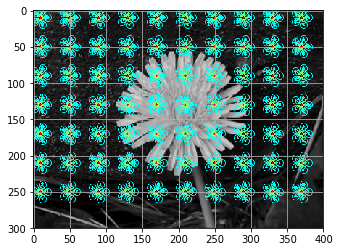

In [75]:
from skimage.feature import daisy

img = img_data[0].reshape(img_size)

# lets first visualize what the daisy descripto looks like
features, img_desc = daisy(img,step=40, radius=10, rings=3, histograms=5, orientations=8, visualize=True)
plt.imshow(img_desc)
plt.grid()

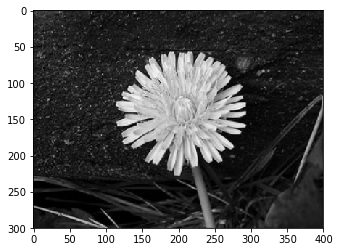

In [76]:
plt.imshow(img,cmap='gray')

In [78]:
features = daisy(img,step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
print(features.shape)
print(features.shape[0]*features.shape[1]*features.shape[2])

(28, 38, 72)
76608


In [79]:
# Borrowed from https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb

# create a function to tak in the row of the matric and return a new feature
def apply_daisy(row,shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=6, orientations=8, visualize=False)
    return feat.reshape((-1))

%time test_feature = apply_daisy(X[3],(h,w))
test_feature.shape

CPU times: user 199 ms, sys: 72.9 ms, total: 272 ms
Wall time: 393 ms


(110656,)

In [83]:
0.393 * len(X) # approximate how long it may run

721.548

In [82]:
# apply to entire data, row by row,
# takes about a 15 minutes to run
%time daisy_features = np.apply_along_axis(apply_daisy, 1, X, (h,w))
print(daisy_features.shape)

CPU times: user 6min 39s, sys: 2min, total: 8min 40s
Wall time: 15min 17s
(1836, 110656)


### 3.5 Nearest Neighbor Classification using Daisy

In [84]:
from sklearn.metrics.pairwise import pairwise_distances
# find the pairwise distance between all the different image features
%time dist_matrix = pairwise_distances(daisy_features)

CPU times: user 39.6 s, sys: 6.27 s, total: 45.9 s
Wall time: 31.8 s


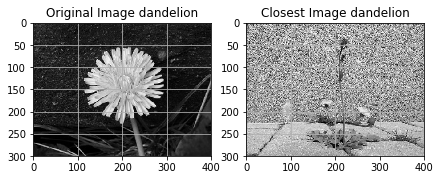

In [87]:
import copy
# find closest image to current image
idx1 = 0
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty # dont pick the same image!
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
plt.imshow(img_data[idx1].reshape(img_size),cmap="gray")
plt.title("Original Image " + img_annotations[idx1])
plt.grid()

plt.subplot(1,2,2)
plt.imshow(img_data[idx2].reshape(img_size),cmap="gray")
plt.title("Closest Image " + img_annotations[idx2])
plt.grid()

The images shown above show the first image in the dataset with the nearest neighbor in the dataset. They are both flowers that are classified as a dandelions. So at least for the first image the classifier has worked.

Next, lets run the nearest neighbor classifier for all of the images in the dataset.

In [96]:
correctly_classified = 0
incorrectly_classified = 0

for idx1 in range(0,len(img_annotations)):
    distances = copy.deepcopy(dist_matrix[idx1,:])
    distances[idx1] = np.infty # dont pick the same image!
    idx2 = np.argmin(distances)
    predicted_class = img_annotations[idx1]
    true_class = img_annotations[idx2]
    if true_class == predicted_class:
        correctly_classified += 1
    else:
        incorrectly_classified += 1

print('Correctly classified by nearest neighbor:',correctly_classified/(correctly_classified+incorrectly_classified)*100,'%')
print('Number of classes:',len(set(img_annotations)))
print('Random classifier:',1/len(set(img_annotations)),'%')

Correctly classified by nearest neighbor: 57.84313725490197 %
Number of classes: 2
Random classifier: 0.5 %


Based on the results above, the DAISY nearest neighbor classifier would not be useful for my prediction task. This is because only about 58% of the images were classified correct and when you consider that I'm only using two classes right now it only makes it worse. 

Let's see if we can figure out what went wrong.

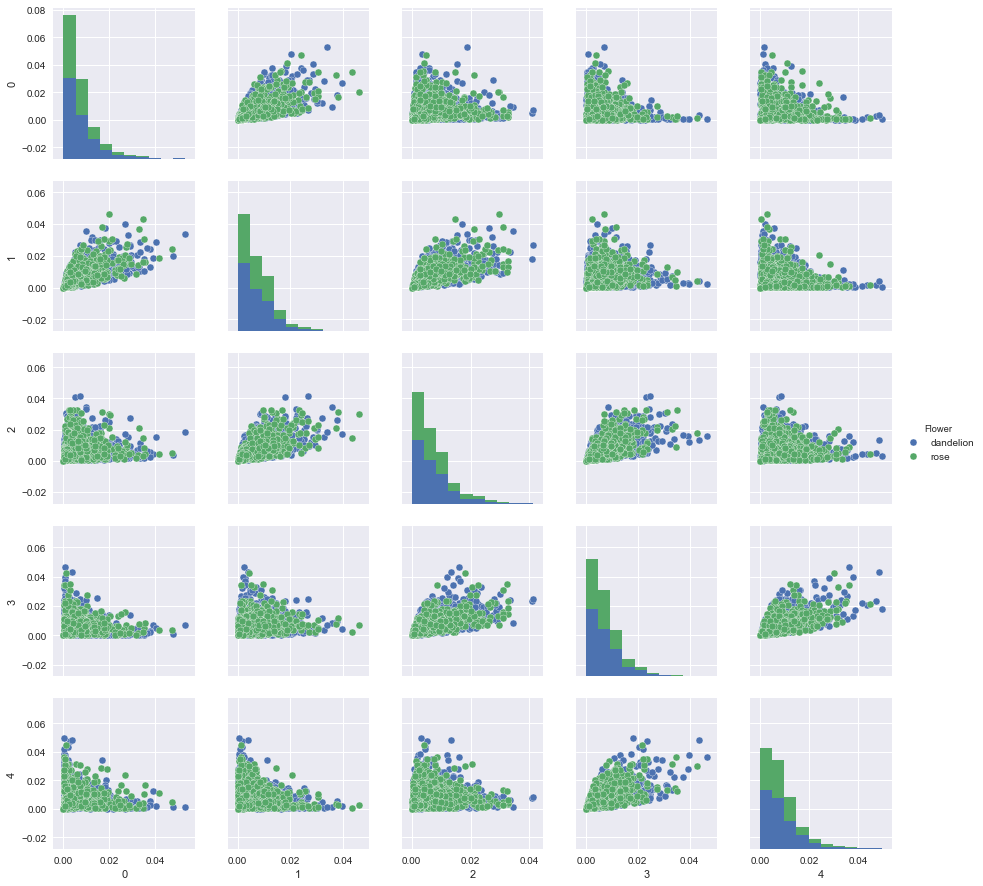

In [101]:
import seaborn as sns

df = pd.DataFrame(np.column_stack((daisy_features[0:1841,0:5], np.array(img_annotations))))

df= df.rename(columns={df.shape[1]-1:'Flower'})
indexes = [x for x in range(0,df.shape[1]-1)]
df[indexes]= df[indexes].astype(np.float64)
sns.set()
sns.pairplot(df,hue="Flower")

As you can see in the plot above, there is a significant amount of overlap between flower features. The plot visualizes the relationships between the first 5 entries for the DAISY feature vector for each image. This overlap between the features of the two flowers explains why there was so much inaccurate classification. 